In [147]:
# setup - make functions for easy comparison of different settings (parameters) later
import sklearn.datasets as datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import math


# generate one of the given sklearn datasets ; options are:
#   1: blobs - generate n-dimensional blobs
#   2: circles - generate concentric circles in 2D space
#   3: moons - generate two half moons in 2D space
#   4: scurve - generate an S curve
#   5: generate a swiss roll
# dimensions and blobCount parameters only apply to blobs
def generateData(n, dataset, dimensions=2, blobCount=2):
  if dataset == "blobs":
    return datasets.make_blobs(n, dimensions, centers=blobCount)
  if dataset == "circles":
    return datasets.make_circles(n)
  if dataset == "moons":
    return datasets.make_moons(n, noise=.02)
  if dataset == "scurve":
    return datasets.make_s_curve(n)
  if dataset == "swiss":
    return datasets.make_swiss_roll(n)

# given a dataset X, treat each point as a node in a 
#   graph and calculate the euclidian
#   distance between each node
def generateDistMtx(X):
  return cdist(X, X)


# apply a given kernel to the distance matrix to 
# generate an affinity matrix for the graph
def generateAffinityMtx(distX, kernel, std=0.1):
  if kernel == "nearestNeighbors":
    return distX < np.average(distX) / 5
  if kernel == "gaussian":
    scale = 1 / (2*(std**2))
    return np.exp(-1 * scale * (distX**2))


# Find "degree" matrix by summing rows of affinity 
#   matrix (ith row corresponds to ith node, so the 
#   sum of the ith row is the degree measure of the ith node,
#   and the degree measure is based on the measure used
#   for the affinity matrix)
# The degree matrix is expressed as a diagonal matrix 
#   containing the degrees of each node
def generateDegreeMtx(affX):
  degrees = np.sum(affX, axis=1)
  return np.diag(degrees)


# Find the laplacian matrix by subtracting the affinity 
#   matrix from the degree matrix, then obtain
#   its eigenvectors. Since we are working with 2D data, we 
#   take the first 2 eigenvectors (corresponding
#   to the smallest eigenvalues) as the new dataset 
#   (the ith element of the new dataset is the new feature
#   vector of the ith element of the original dataset)
def generateLaplacianEigenvectors(degX, affX, is3D):
  L = degX - affX
  W, V = np.linalg.eig(L)
  newData = V[:, W.argsort()]
  dimensions = 3 if is3D else 2
  newData = newData[:, 0:dimensions]
  return newData

# The ith data element of the new data corresponds to the 
#   (transformed version of the) ith data element of the 
#   original data (obtained from generateData()). Using 
#   this new data, this function fits a clustering model
#   and returns the predictions; these predictions exactly
#   correspond to predictions for the original dataset
def generatePredictions(newDataset, classifier, nClusters):
  if classifier == "kmeans":
    model = KMeans(nClusters)
    model.fit(newDataset)
    return model.labels_


# plot the data with the given labels
def plotClusters(data, labels, is3D=False):
  if not is3D:
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.show()
  if is3D:
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels)
    plt.show()
  


# Using all the functions defined above, run the spectral clustering
# algorithm on a general dataset
def executeSpectralClustering(X, nClusters, kernel="gaussian", std=.08, is3D=False):
  dist = generateDistMtx(X)
  A = generateAffinityMtx(dist, kernel, std)
  D = generateDegreeMtx(A)
  newData = generateLaplacianEigenvectors(D, A, is3D)
  labels = generatePredictions(newData, "kmeans", nClusters)
  plotClusters(X, labels, is3D)



True labels: 


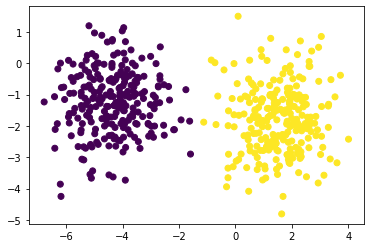

Spectral clustering results: 


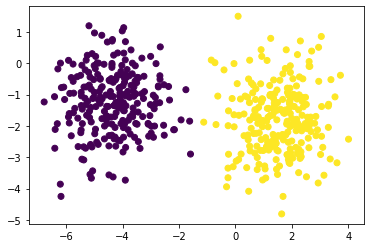

In [148]:
### Spectral clustering on 2D blobs with a gaussian kernel ###

nPoints = 500
kernel = "gaussian"
std = 1/math.sqrt(2)
is3D = False

# generate 2 blobs of data in 2D
X, y = generateData(nPoints, "blobs", 2, 2)
nClusters = np.size(np.unique(y))

# plot true labels vs labels obtained from spectral clustering:
print("True labels: ")
plotClusters(X, y, is3D)
print("Spectral clustering results: ")
executeSpectralClustering(X, nClusters, kernel, std, is3D)

True labels: 


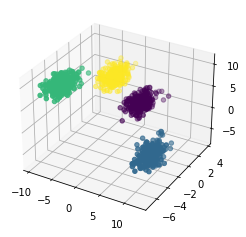

Spectral clustering results: 


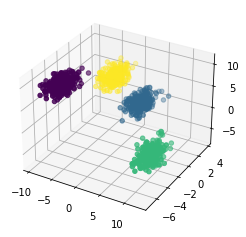

In [150]:
### Spectral clustering on 3D blobs with a gaussian kernel ###

nPoints = 1000
kernel = "gaussian"
std = 1/math.sqrt(2)
is3D = True

# generate 4 blobs of data in 3D
X, y = generateData(nPoints, "blobs", 3, 4)
nClusters = np.size(np.unique(y))

# plot true labels vs labels obtained from spectral clustering:
print("True labels: ")
plotClusters(X, y, is3D)
print("Spectral clustering results: ")
executeSpectralClustering(X, nClusters, kernel, std, is3D)

True labels: 


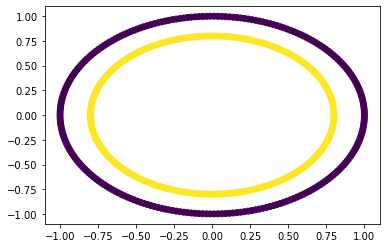

Spectral clustering results: 


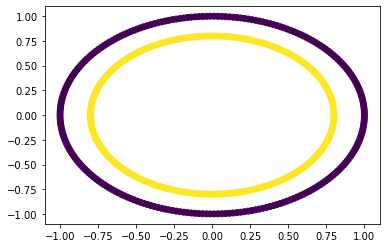

In [152]:
### Spectral clustering on 2D circles with a gaussian kernel ###

nPoints = 500
kernel = "gaussian"
std = .009
is3D = False

# generate 2 concentric circles in 2D
X, y = generateData(nPoints, "circles")
nClusters = np.size(np.unique(y))

# plot true labels vs labels obtained from spectral clustering:
print("True labels: ")
plotClusters(X, y, is3D)
print("Spectral clustering results: ")
executeSpectralClustering(X, nClusters, kernel, std, is3D)

True labels: 


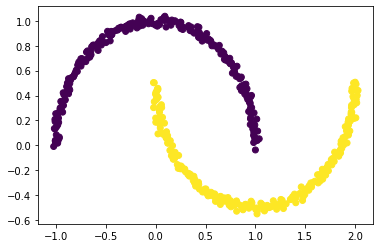

Spectral clustering results: 


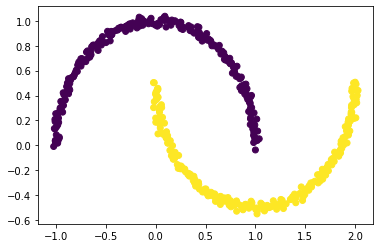

In [153]:
### Spectral clustering on 2D half-moons with a gaussian kernel ###

nPoints = 500
kernel = "gaussian"
std = .01
is3D = False

# generate 2 half-moons in 2D
X, y = generateData(nPoints, "moons")
nClusters = np.size(np.unique(y))

# plot true labels vs labels obtained from spectral clustering:
print("True labels: ")
plotClusters(X, y, is3D)
print("Spectral clustering results: ")
executeSpectralClustering(X, nClusters, kernel, std, is3D)

Spectral clustering results: 


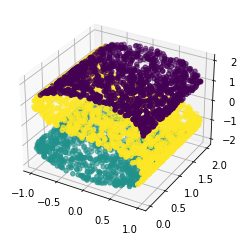

In [154]:
### Spectral clustering on a 3D "S-curve" with a gaussian kernel ###

nPoints = 4000
kernel = "gaussian"
std = .07
is3D = True

# generate an S-curve in 3D - note that there are no labels given with this dataset, so
#   we just set the number of perceived clusters to be 3, which works relatively well in this
#   visualization (since there are 3 main sections of the curve)
X, _ = generateData(nPoints, "scurve")
nClusters = 3

# plot labels obtained from clustering the s-curve with 3 clusters
print("Spectral clustering results: ")
executeSpectralClustering(X, nClusters, kernel, std, is3D)

Spectral clustering results: 


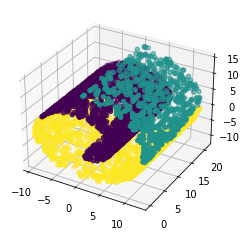

In [156]:
### Spectral clustering on 3D "swiss roll" with a gaussian kernel ###

nPoints = 4000
kernel = "gaussian"
std = 1/math.sqrt(2)
is3D = True

# Generate a swiss roll of data points in 3D
# Note that there are no labels for this data, so we set the number of clusters to 3, and it clusters
#   along the direction of the swiss roll. This is similar to the concentric circles in 2D, and shows
#   another advantage of spectral clustering vs a radial clustering algorithm
X, _ = generateData(nPoints, "swiss")
nClusters = 3

# plot labels obtained from spectral clustering
print("Spectral clustering results: ")
executeSpectralClustering(X, nClusters, kernel, std, is3D)